# Overview

* Launched in 1996 by CreditSuisse.
* Objective: **model risk on a portfolio basis**

Three main models:

* The structural models: there are two models of management of credit  portfolio who are supplied in the literature: Moody's KMV model (Portfolio Model) and CreditMetrics model by JPMorgan.
* The Macro-factors model (Econometric model): The Credit Portfolio View model introduces in 1998 by Mckinsey.
* The actuarial models CSFP (Credit Suisse First Boston): this model (CreditRisk+) is developed in 1997.
## Variables

* **Size** and **maturity** of a debt exposure
  * A credit exposure is how much a debt is worth (eg. $10000), or in other words the maximum potential loss in case of default
* Credit quality (i.e. **default rates**)
  * Here, observed credit spreads and ratings (AAA, AA, etc) can be used
  * Default rates are modelled as continuous random variables, incorporating their volatility and background effects: default rate volatilities and sector analysis.
  * Correlations are not used directly, and does not consider causes for default
* **Default rate volatilities**
* **Recovery rates**: how much a company reduces their losses after a default, considering foreclosure, liquidation or restructuring of the debt. In other words, 
$$\mathrm{Loss = Exposure - Recovery}$$


## Main considerations
* Insurance (a few sudden events) vs. financial (continuous time series) techniques for modelling
* Only consider credit default risk

Note: in theory, we could also consider **credit spread risk** on top of credit default. This is a quantity only exhibited in mark-to-market scenarios, where actions of the counterparty may reduce their credit rating and thus make the debt less valuabe.
* Example: consider a corporate bond (debenture). If the issuer's credit rating goes down, the bond is less valuable. This is an opportunity cost risk.

# Technical considerations
The CreditRisk+ presents four hypotheses:
* Every individual credit presents only two possible states: failures or no failures.
* The default probability of an individual credit is low.
* The default probability for a big group of borrowers is very low.
* The number of default over a period is independent from that of any
other period.

From a modelling perspective, this can be translated into the following chain of reasoning:
* For a rare set of events, we can show that a **Poisson distribution** is good at modelling the **count** of default events, if **each default is considered as a Bernoulli variable**
* However, since $E[\mathrm{Total\;loss}] = \mathrm{Default\;probability} \times \mathrm{Lost\;amount}$, the loss distribution will not be Poisson
* Common workaround in insurance: model the loss per default as an **exponential distribution**
* Workaround here: model each loss individually and consider not the probability, but the **probability generating function**. This allows for a recursive calculation of the loss distribution


---

# Default event modelling

#### Prop. [Sum of multiple rare Bernoulli variables is Poisson]
> Let $X_A \sim \mathrm{Bernoulli}(p_A)$ be the default event for a single individual. Let $$X = \sum_A X_A$$ be the total amount of defaults across all $N$ individuals, where we assume all $X_A$'s are independent, for all $A$. If $p_A \ll 1$ for all $A$, then approximately it holds $$ X \sim \mathrm{Poisson}(\mu),\quad \mu \equiv \sum_A p_A$$ where $\mathrm{Poisson}(\mu)$ denotes a discrete random variable with PMF $${P}(X=k) = e^{-\mu} \frac{\mu^k}{k!} 1_{k \in \mathbb{Z}_+}$$

Proof:
> Let $F_A(z)$ be the probability generating function (PGF) for $X_A$, namely $F_A(z) = \sum_{n \geq 0} P(n\mbox{ defaults}) z^n$. For a Bernoully variable, this is equivalent to $F_A(z) = 1-p_A + p_A z$.  Now consider the PGF for $X$, $F_X(z) = \sum_{n \geq 0} P(n\mbox{ defaults}) z^n$. Since all $X_A$'s are independent, we can write $$F_X(z) = \prod_A F_A(z) = \prod_A [1 + p_A (z-1)].$$ Taking the log we have $$\log F_X(z) = \sum_A \log(1 + p_A (z-1)) \approx \sum_A p_A (z-1)$$ where we used that $p_A \ll 1$ to approximate $\log(1+x) \approx x + O(x^2)$. Exponentiating back we get $$F_X(z) \approx e^{(z-1) \sum_A p_A} =: e^{\mu (z-1)} = e^{-\mu} \sum_{n\geq 0} \frac{\mu^n}{n!} z^n.$$ Comparing this with the definition of $F_X$ gives $P(n\mbox{ defaults}) = e^{-\mu} \mu^n/n!$, which is the probability mass for a Poisson variable. $\mathrm{\square}$

Under this model, one would expect a standard deviation of $\sqrt{\mu}$ for the total defaults, but historical errors are much larger. This suggestes that there are background factors or variations of observed default rates over time which increase the overall uncertainty.

Notice that, had we not been able to identify the probabilities directly by inspection of the formula, one could use that $$F_X(z) = \sum_{n\geq 0} P(X=n)z^n$$ and invert it: $$P(X=n) = \frac{1}{n!}\left.\frac{d^n F_X}{dz^n}\right|_{z=0}$$

This will be useful below.

---

# Insurance modelling: Poisson processes and compound processes
#### (Not part of the CreditRisk+ paper)

We could stop the core modelling process here. There would only be one additional ingredient: how to transform a count of default events into dollar losses. This can be done (as it is, in the insurance setting) according to the recipe below.

#### Def. [Poisson process]
A stochastic process $N(t)$ is a Poisson process with rate $\lambda(t)$ if:
* $N(t)$ is a counting process, namely $N(0) = 0$, $N(t)$ takes values in $\{0,1,2,\ldots\}$, and the map $t \mapsto N(t)$ is non-decreasing with probability 1;
* $N$ is $(\mathcal{F}_t)_{t\geq 0}$-adapted, i.e. $N(t)$ is $\mathcal{F}_t$-measurable
* For any $t \geq 0$ and $h > 0$, one has that $N(t+h)-N(t)$ is independent of $\mathcal{F}_t$
* For any $t \geq 0$ and $h > 0$, one has

$$N(t+h) - N(t) \sim \mathrm{Poisson}\left(\mu=\int_t^{t+h} \lambda(s)ds \right)$$
where $\mathrm{Poisson}(\mu)$ denotes a discrete random variable with PMF
$$\mathbb{P}(X=k) = e^{-\mu} \frac{\mu^k}{k!} 1_{k \in \mathbb{Z}_+}$$

> A Poisson process is a stochastic process (in fact, a Markov process) which either grows or stays the same over time, with the number of events happening in a given interval independent of how many happened before, and following a Poisson distribution.

> Note that a Poisson process is **not** a martingale, but the so-called **compensated Poisson process** $$M(t) := N(t) - \int_0^t \lambda(s)ds$$ is, namely $E[M(t)|\mathcal{F}_s] = M(s)$. This shows that $N$ is in fact a submartingale.

The main tool to mix **frequency** with **severity** for a Poisson process is the one below:

#### Def. [Compound Poisson process]
A stochastic process $S(t)$ is a compound Poisson process if one can write

$$S(t) = \sum_{j=0}^{N(t)} X_j$$
where:
* $N$ is a Poisson process with rate $\lambda(t)$
* All $X_j$ are iid (but otherwise freely chosen)
* For all $t$, $N(t)$ is independent of all the $X_i$'s.

> Application: insurance. Let $N$ denote the default Poisson process and $X$ be the loss per default. We model $$N \sim \mathrm{PoissonProcess}(\lambda(t)),\quad X \sim \mathrm{Exponential}(\theta)$$ If we can further assume $N(t)$ to be big (which is likely to happen after sufficient time), then $S(t)$ will be basically the sum of many iid variables and, from the CLT, can be approximated as a normal variable.

> Recall that an exponential variable is a continous one with PDF
$$p(x|\theta) = \theta e^{-\theta x} 1_{x \geq 0}$$

#### Prop. [statistics for a Compound Poisson process]
$$E[S(t)] = E[N(t)]E[X]\quad \mbox{(aka Wald's equation)}$$
$$\mathrm{Var}[S(t)] = E[N(t)] E[X^2] = E[N(t)]\mathrm{Var}[X] + \mathrm{Var}[N(t)] E[X]^2$$

> Application (continuation of the one before). Let $N \sim \mathrm{PoissonProcess}(\lambda=20\mbox{ claims/day})$ and $X \sim \mathrm{Exponential}(\theta=\$500)$. We can then calculate the amount of losses in the first 10 days, $S(10)$: $$E[S(10)] = E[N(10)] E[X];$$ now $N(10) = N(10)-N(0) \sim \mathrm{Poisson}(20\times10) = \mathrm{Poisson}(200)$ and $E[X] = \theta = 500$, so $$E[S(10)] = 200\times 500 = \$100k.$$ Its variance can be calculated with the formulae above as $\$10k$, and if we assume a sufficiently high number of defaults, we can approximate $$S(10) \sim \mathcal{N}(\mu=\$100k, \sigma=\$10k).$$

The CreditRisk+ model goes beyond independent modelling of default events and losses, and instead considers known exposures to each obligor in the portfolio. We analyze this approch in what follows.

# Distribution of losses in the CreditRisk+ model

This discussion above (in the simplified insurance setting) assumes independent laws for the default count and each default's financial impact (loss). In what follows, we use **explicit modelling of each obligor's total exposure** to derive the **distribution of total losses**.

#### Key variables:
* Exposure [unit: currency] of obligor $A$: $e_A$
* Default probability of obligor $A$: $p_A$ as before
* Expected loss [unit: currency] for obligor $A$: $\ell_A$

For consistency, it must hold that $$\ell_A = p_A e_A$$.

Obs: in the original paper, $e_A$ is called $v_A$ and $\ell_A$ is $\epsilon_A$.

To simplify the notation of the paper, we assume a base currency that is kept fixed.

### Key variables

An analytic expression for the loss can be obtained by **discretizing the losses into integer intervals** (in units of the base currency). That is, we map $$e_A \mapsto \left\lfloor e_A \right\rfloor$$
so that we can consider a integer-valued (and thus discrete) version of the theoretical loss random variable.

We can now consider our exposures to be in a set $\{e_j\}_{j\in \mathbb{Z}_+}$ where every $e_j$ is an integer. This way, obligors with the same exposure will be grouped together. 

For every band $j$, we then define
* $\ell_j$ [unit: currency] as the expected loss for band $j$, i.e. the one associated with the obligors with exposure $e_j$. We can also write $$\ell_j = \sum_{A: e_A = e_j} {\ell_A}$$
* $\mu_j$, the expected **number of defaults** in band $j$. It is defined via $$\ell_j =: e_j \mu_j$$

Recall, from that the total amount of defaults (either in a band or in general) are given by a Poisson variable with a parameter equal to the sum of default probabilities of each individual in the portfolio. For a Poisson variable $X \sim \mathrm{Poisson}(\lambda)$, it holds that $E[X] = \lambda$, so the expected amount of defaults is exactly the sum of the individual probabilities. Thus, it must hold that $$\mu := \sum_{j\geq 0} \mu_j$$ is equal to $\mu$ as defined in the first section, $$\mu = \sum_A p_A$$.

### Obtaining the loss distribution

As before, let us define a probability-generating function $z\mapsto G(z)$ for the aggregate loss, via $$G(z) = \sum_{n\geq 0} P(\mbox{aggregate loss = $n$ units of currency}) z^n.$$ Notice here that we are considering $n$ to have units of currency (so, theoretically, $n = n_{unitless} \times \mathrm{USD}$ for example), which is different from the previous case where it measured the (dimensionless) count of defaults.

Assuming independence among different bands, we can again decompose $$G(z) = \prod_{j\geq 0} G_j(z)$$ where $$G_j(z) = \sum_{m \geq 0} P(m\mbox{ defaults in band }j) z^{m e_j}.$$ Here, notice that $m$ is a counter for defaults, so to make the exponent emulate the dollar loss in $G$, we need to multiply by the band's exposure.

We can now consider each band $j$ as its own separate world, where $$P(\mbox{$m$ defaults in band $j$}) = e^{-\mu_j} \mu_j^m/m! $$

Plugging this back into $G_j$ yields $$G_j(z) = \exp(-\mu_j + \mu_j z^{e_j}),$$ and so the full probability-generating function is just $$G(z) = \prod_{j \geq 0} \exp(-\mu_j + \mu_j z^{e_j}) = \exp\left(-\sum_{j\geq 0} \mu_j + \sum_{j\geq 0} \mu_j z^{e_j} \right)$$

To extract the actual probabilities
$$P(\mbox{aggregate loss = $n$}) = \left.\frac{1}{n!} \frac{d^n G}{dz^n}\right|_{z=0} := P_n$$

we can actually iteratively differentiate the equation above, and make it into a recurrence relation. The result is:
$$\boxed{\begin{cases}
P_0 &= e^{-\mu} = \exp\left(-\sum_{j\geq 0} \frac{\ell_j}{e_j}\right)\\
P_n &= \sum_{j: e_j \leq n} \frac{\ell_j}{n} P_{n-e_j}
\end{cases}}$$

We have now all we need:
* As a portfolio holder, we have access to all the exposures $e_A$ and probabilities $p_A$ of the obligors, so we can easily calculate $\mu_j = \sum_{A: e_A = e_j} p_A$ and $\ell_j = e_j \mu_j$. 
* This allows us to calculate $P_0$. 
* With it, we can then recursively calculate all other probabilities

## Implementation

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm.notebook import tqdm

In [212]:
np.random.seed(2)
n_borrowers = 2000
p_A = np.random.uniform(low=0.0, high=0.005, size=n_borrowers)  # create p_A's from a uniform distribution
e_A = 1+np.random.exponential(scale=1000, size=n_borrowers)      # create e_A's from an exponential distribution

In [213]:
# Check that total defaults follow a Poisson distribution via Monte-Carlo simulation
n_mc = 10000

total_defaults = (np.random.uniform(0,1, size=(10000, n_borrowers)) <= np.broadcast_to(p_A, (10000, n_borrowers))).\
    sum(axis=1)

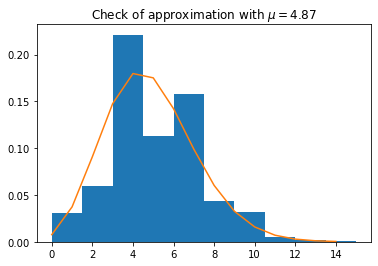

In [214]:
plt.hist(total_defaults, density=True, label="Empirical histogram")
k=np.array(range(total_defaults.min(),total_defaults.max()))
plt.plot(k, scipy.stats.poisson.pmf(k, mu=p_A.sum()), label="Theoretical Poisson distribution")
plt.title("Check of approximation with $\mu = $"+str(round(p_A.sum(),2)))
plt.show()

Conclusion: the Poisson distribution works well here!

In [215]:
# create e_j by rounding
e_j = np.floor(e_A).astype(int)
e_j_unique = np.sort(np.unique(e_j))
print(f"The vector e_j has {len(e_j_unique)} unique components")

The vector e_j has 1323 unique components


In [219]:
mu_j = []
for ej in tqdm(e_j_unique):
    temp_mu_j = 0
    for pa, ea in zip(p_A, e_j):
        if ea == ej:
            temp_mu_j += pa
    mu_j.append(temp_mu_j)
mu_j = np.array(mu_j)

  0%|          | 0/1323 [00:00<?, ?it/s]

In [220]:
l_j = mu_j * e_j_unique

In [221]:
# recurrence relation
p = {i: np.nan for i in range(0, e_j_unique.max())}
p[0] = np.exp(-mu_j.sum())

In [222]:
for n in tqdm(range(1, e_j_unique.max())):
    p[n] = 1/n * np.sum([lj * p[n-ej]  for lj, ej in zip(l_j, e_j_unique) if ej <= n])

  0%|          | 0/7094 [00:00<?, ?it/s]

# References
https://hal.archives-ouvertes.fr/hal-01696011/document

Solução usando while